<a href="https://colab.research.google.com/github/christian7777777777/Introduccion-a-la-vision-artificial/blob/main/Estimaci%C3%B3n_de_postura_con_MediaPipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar dependencias

In [ ]:
!pip install mediapipe opencv-python matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 34.9 MB/s eta 0:00:00


# Importar Librerias

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

# Inicializar el detector y herramientas de estimacion de postura

In [ ]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Estimacion de postura en una imagen

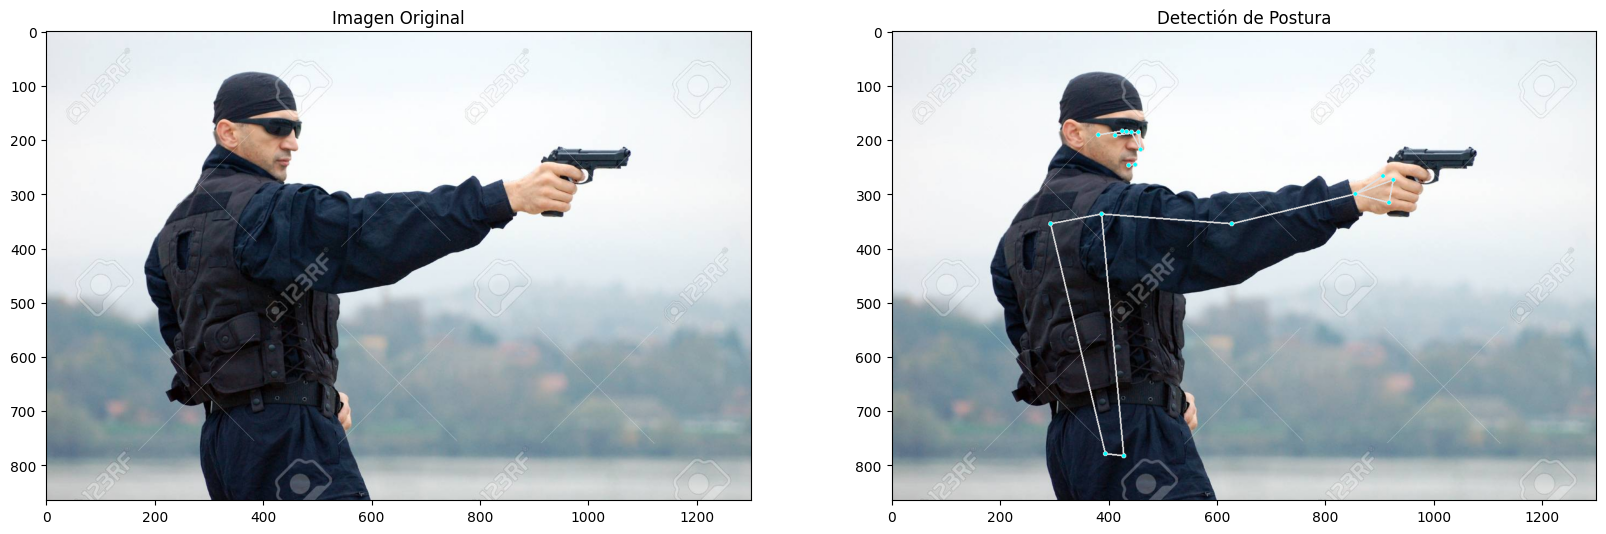

In [ ]:

img = cv2.imread('/content/1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Procesar con MediaPipe
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:

    results = pose.process(img_rgb)

# Dibujar landmarks
annotated_image = img.copy()
mp_drawing.draw_landmarks(
    annotated_image,
    results.pose_landmarks,
    mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,0), thickness=2, circle_radius=2))

# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(img_rgb)
ax[0].set_title('Imagen Original')
ax[1].imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Detectión de Postura')
plt.show()

# Estimacion de postura en video

In [ ]:
#3. Procesamiento de video

video_path = '/content/video_robo_ecuador_33.mp4'

# Cargar video
cap = cv2.VideoCapture(video_path)

# Configurar MediaPipe
pose = mp_pose.Pose(
    min_detection_confidence=0.8,
    min_tracking_confidence=0.5)

# Crear video de salida
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (frame_width, frame_height))

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Convertir a RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    # Dibujar landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    out.write(frame)

cap.release()
out.release()

#Analisis de relaciones entre puntos clave

Ángulo del codo derecho: 139.14 grados


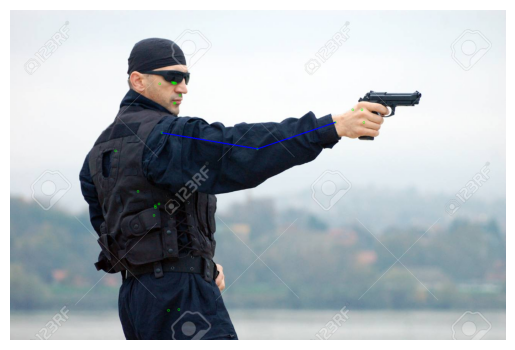

In [ ]:
#4. Análisis de datos de postura

import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

# Inicializar MediaPipe
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

# Cargar y procesar la imagen
image = cv2.imread('/content/1.jpg')  # Asegúrate de cambiar la ruta a tu imagen
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

# Extraer coordenadas de landmarks
landmarks = results.pose_landmarks.landmark
pose_data = []
for landmark in landmarks:
    pose_data.append([landmark.x, landmark.y, landmark.z, landmark.visibility])

# Convertir a array numpy
pose_array = np.array(pose_data)

# Función para calcular ángulos articulares
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

# Ejemplo: Ángulo del codo derecho
shoulder = pose_array[mp_pose.PoseLandmark.RIGHT_SHOULDER.value][:2]
elbow = pose_array[mp_pose.PoseLandmark.RIGHT_ELBOW.value][:2]
wrist = pose_array[mp_pose.PoseLandmark.RIGHT_WRIST.value][:2]

angle = calculate_angle(shoulder, elbow, wrist)
print(f'Ángulo del codo derecho: {angle:.2f} grados')

# Dibujar landmarks en la imagen
if results.pose_landmarks:
    for landmark in landmarks:
        h, w, c = image.shape
        cx = int(landmark.x * w)
        cy = int(landmark.y * h)
        cv2.circle(image, (cx, cy), 3, (0, 255, 0), 1)

    # Dibujar líneas entre los landmarks para la postura
    cv2.line(image,
             (int(shoulder[0] * w), int(shoulder[1] * h)),
             (int(elbow[0] * w), int(elbow[1] * h)),
             (255, 0, 0), 2)
    cv2.line(image,
             (int(elbow[0] * w), int(elbow[1] * h)),
             (int(wrist[0] * w), int(wrist[1] * h)),
             (255, 0, 0), 2)


# Mostrar la imagen
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Seleccionar solo landmarks de preferencia

Ángulo del codo derecho: 174.31 grados
Ángulo del codo izquierdo: 173.39 grados


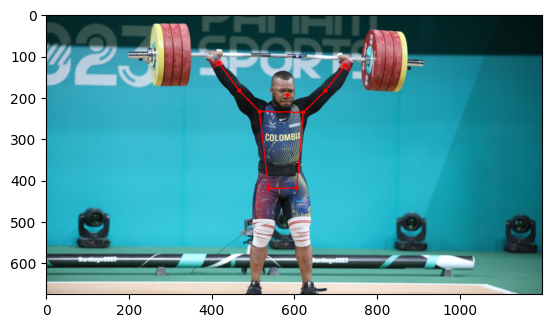

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Landmarks específicos que deseas visualizar
landmark_indices = [0, 11, 12, 13, 14, 15, 16, 23, 24]

# Función para calcular el ángulo entre tres puntos
def calculate_angle(a, b, c):
    a = np.array(a)  # Primer punto
    b = np.array(b)  # Segundo punto
    c = np.array(c)  # Tercer punto

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

# Imagen de ejemplo
image = cv2.imread('/content/Prueba_landmaks.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        # Obtener las coordenadas de los landmarks
        landmarks = results.pose_landmarks.landmark

        # Calcular el ángulo del codo derecho
        shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
        elbow_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        wrist_right = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                      landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        angle_right = calculate_angle(shoulder_right, elbow_right, wrist_right)

        # Calcular el ángulo del codo izquierdo
        shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        elbow_left = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        wrist_left = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
        angle_left = calculate_angle(shoulder_left, elbow_left, wrist_left)

        # Imprimir los ángulos
        print(f"Ángulo del codo derecho: {angle_right:.2f} grados")
        print(f"Ángulo del codo izquierdo: {angle_left:.2f} grados")


        # Dibuja los landmarks seleccionados y las conexiones en la imagen original
        annotated_image = image.copy()

        # Dibujar solo los landmarks seleccionados
        for i in landmark_indices:
            landmark = results.pose_landmarks.landmark[i]
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(annotated_image, (x, y), 5, (0, 0, 255), -1)  # Dibujar un círculo verde

        # Dibujar las conexiones entre los landmarks seleccionados
        connections = mp_pose.POSE_CONNECTIONS
        for connection in connections:
            if connection[0] in landmark_indices and connection[1] in landmark_indices:
                landmark1 = results.pose_landmarks.landmark[connection[0]]
                landmark2 = results.pose_landmarks.landmark[connection[1]]
                x1 = int(landmark1.x * image.shape[1])
                y1 = int(landmark1.y * image.shape[0])
                x2 = int(landmark2.x * image.shape[1])
                y2 = int(landmark2.y * image.shape[0])
                cv2.line(annotated_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Dibujar una línea roja

        # Muestra la imagen
        import matplotlib.pyplot as plt
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.show()